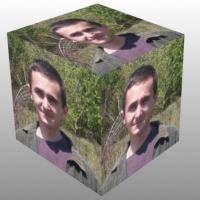

In [139]:
from wand.image import Image as WImage
img = WImage(filename='/home/machine_learning/Desktop/Alexandru.jpg')
img

In [138]:

###############################################MARKOV  INTERPOLATION#####################################################
class  qml(object):
    def __init__(self,data):
        self.data=data
    def  get_chunck(self,index,chain_order):
        data=self.data
        if index+1-chain_order<0:
            print("chain order must   smaller  then   sequence length")
        else:
            chunck=[]
            start=index+1-chain_order
            end=index+1
        return(data[start:end])
    def  MLH(self,index,chain_order):
        #makes   probabilty  estimate according  to  degree  of   markov chain order  with the   natural maximum 
        #likelihood estimator  like this( could be generalized)
        #Q(ement/first_previous_element,second_previous_element)=
        #card({elem,first_previous_element,second_previous_element})/card({previous_element,second_previous_element})
        #form entity  history
        chunk=self.get_chunck(index,chain_order)
        nominator=chunk
        denominator=chunk[:-1]
        data=self.data
        card_nominator=sum(data[i:i+len(nominator)]==nominator for i in range(len(data)))
        card_denominator=sum(data[i:i+len(denominator)]==denominator for i in range(len(data)))
        q=card_nominator/card_denominator
        #q is the modeled probability   of    occuring   value   at inde conditioned  my   markov chain  order
        return(q)
    def  interpolation(self,lambda_list,chain_order_list):
        """lambda  list  of lambdas like  lambda1 , ....,lambdak,  chain_order_list=[index,chain_order]"""
        #print("TO DO  BEYHAN")
       
        interpolation=[]
        for  chain in chain_order_list:
            #print(self.get_chunck(chain[0],chain[1]))
            interpolation.append(self.MLH(chain[0],chain[1]))
        if  len(lambda_list)!=chain_order_list[0][1]:
            print(" crazy   dude")
        else:
            w_average=0
            for  i in range(0,len(lambda_list)):
                w_average=w_average+(lambda_list[i]*interpolation[i])
                
                
        return [interpolation,w_average]
 
 

In [126]:
import pandas  as pd
import numpy as np
train=pd.read_csv('train3.csv')
test=pd.read_csv('test3.csv')

In [133]:
def  create_data(df, columns,index):
    #3 d columns
    """Creates  markovian  history"""
    order3=df[columns[0]][index]
    order2=df[columns[1]][index]
    order1=df[columns[2]][index]
    subset=df[(df[columns[0]]==order3)&(df[columns[1]]==order2)]
    subset=pd.DataFrame(subset,columns=columns)
    import itertools
    subset=subset[:].values.tolist()
    subset=list(itertools.chain(*subset))
    #subset now  is list  with   history  of particular   trigram
 
 
    return subset

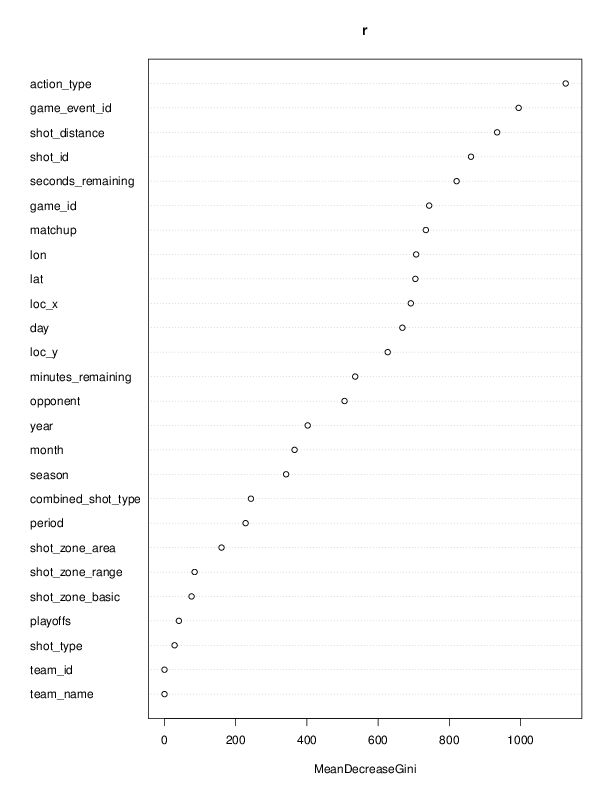

In [140]:
"""make markovian features    from the  ones  influencial with outcome"""
from wand.image import Image as WImage
img = WImage(filename='/home/machine_learning/Desktop/correlations.pdf')
img


In [141]:
top_features=['action_type','game_event_id','shot_distance','shot_id','seconds_remaining','game_id','matchup']

train[top_features].head(3)

,action_type,game_event_id,shot_distance,shot_id,seconds_remaining,game_id,matchup
0,27,12,15,2,22,20000012,29
1,27,35,16,3,45,20000012,29
2,27,43,22,4,52,20000012,29


In [146]:
cor_matrix=pd.read_csv('/home/machine_learning/Desktop/correlation.csv')
cor_matrix

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,matchup,opponent,shot_id,year,month,day
0,1.000000,-0.108350,-0.010595,-0.015213,-0.122225,-0.001575,0.048120,NaN,0.007609,-0.008599,...,-0.089023,-0.120780,NaN,NaN,-0.008189,-0.020140,0.000118,0.040078,0.006628,-0.004672
1,-0.108350,1.000000,-0.005515,0.010195,0.184439,-0.004127,-0.148501,NaN,-0.000084,-0.003990,...,0.165757,0.203873,NaN,NaN,0.004876,0.003849,0.002617,-0.014759,0.008516,-0.001387
2,-0.010595,-0.005515,1.000000,-0.005982,-0.026195,-0.029954,0.059602,NaN,-0.274276,0.955914,...,-0.086584,-0.016517,NaN,NaN,-0.003703,-0.005696,0.025433,0.037361,-0.002840,-0.016741
3,-0.015213,0.010195,-0.005982,1.000000,0.006150,-0.012944,-0.011361,NaN,0.009581,0.005061,...,0.005887,0.032371,NaN,NaN,0.044266,0.121406,0.761232,-0.236151,-0.087776,0.025468
4,-0.122225,0.184439,-0.026195,0.006150,1.000000,0.020467,-0.794538,NaN,0.013275,-0.023204,...,0.561662,0.610962,NaN,NaN,0.009265,0.008982,-0.031110,-0.092570,-0.000564,0.007067
5,-0.001575,-0.004127,-0.029954,-0.012944,0.020467,1.000000,-0.017578,NaN,0.006624,-0.030059,...,0.055743,-0.041873,NaN,NaN,-0.009655,-0.005557,-0.012453,0.006239,-0.007749,0.000993
6,0.048120,-0.148501,0.059602,-0.011361,-0.794538,-0.017578,1.000000,NaN,-0.077399,0.039737,...,-0.675706,-0.599703,NaN,NaN,-0.002179,-0.011617,0.033476,0.097739,-0.005204,-0.005650
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.007609,-0.000084,-0.274276,0.009581,0.013275,0.006624,-0.077399,NaN,1.000000,-0.047021,...,0.093937,-0.015270,NaN,NaN,0.011058,0.006977,-0.008251,-0.025022,0.010494,0.006602
9,-0.008599,-0.003990,0.955914,0.005061,-0.023204,-0.030059,0.039737,NaN,-0.047021,1.000000,...,-0.062285,-0.022243,NaN,NaN,-0.015244,0.011181,-0.003357,-0.019050,-0.018274,-0.013197


In [153]:
d={}
columns=['action_type','combined_shot_type','shot_zone_range']
 
newfeature=[]
for  i in range(train.shape[0]):
    s=create_data(train,columns,i)
    l=[1/3,1/3,1/3]
    chain_order_list=[[2,3],[2,2],[2,1]]
    q=qml(s)
    interpolation_result=q.interpolation(l,chain_order_list)[1]
    newfeature.append(interpolation_result)
    dict_keys=str(train[columns[0]][i])+str(train[columns[1]][i])
    d[dict_keys]=interpolation_result
train['newfeature']=newfeature

newfeature=[]
for  i  in range(test.shape[0]):
    test_keys=str(test[columns[0]][i])+str(test[columns[1]][i])
    test_query=d.get(test_keys,-1)
    newfeature.append(test_query)
test['newfeature']=newfeature
 

In [154]:
len(newfeature)

5000

In [155]:
 
from sklearn.metrics import  log_loss
log_loss(np.array(train['shot_made_flag']),np.array(train['newfeature']))

0.72477651595332482

In [156]:
train.to_csv("stackedTrain.csv",index=False)

In [157]:
test.to_csv("stackedTest.csv",index=False)